# Loading Data

The dataset that we are using is "Google play store reviews". We can directly download it from Kaggle and use it in the same directory as we are working on. Or we can directly download it from kaggle.

Dataset Link: https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews



## First Way (Just for code Authors)
1. we have to upload the dataset file in some directory in our Google Drive so we can access it later.

2. We may connect to our Google Drive Using following code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. We would locate the file in our Google Drive and change the working directory path so we can use it in our code.

My local path for dataset is:
'/content/drive/MyDrive/Colab_Notebooks/INM706_CW_2022'

So the code would look like this:

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/INM706_CW_2022')

## Second way (For Others)

In this way, anyone who has access to this notebook can download the dataset directly from kaggle and run it on Colab and other devices

In [ ]:
import os
!echo <{"username":"mohamadesmaeeli","key":"47b451de763b356065cd33803773d39a"}> ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

os.environ['KAGGLE_USERNAME'] = 'mohamadesmaeeli'
os.environ['KAGGLE_KEY'] = '47b451de763b356065cd33803773d39a'

!kaggle datasets download -d prakharrathi25/google-play-store-reviews

!unzip /content/google-play-store-reviews.zip

google-play-store-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/google-play-store-reviews.zip
replace reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: reviews.csv             


# Data Visualization and Exploration

Now that we have access to the dataset, we can explore the data to have more insights about it.

1. Reading data using pandas library:


Dataset size: (12495, 12)
Total number of Google App Review: 12495


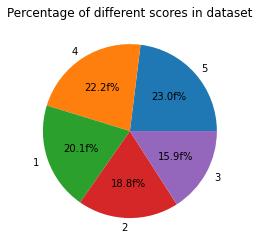

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
6107,gp:AOqpTOGowrI3ehnbrkkFUkyZhQZ2_lOz8Bhqvx2VDRU...,Samyantak Bhardwaj,https://play-lh.googleusercontent.com/a-/AOh14...,A bit of headache in beginning.. but awesome!,4,1,2.0.4,2017-11-11 06:45:47,NaN,NaN,newest,com.levor.liferpgtasks
2994,gp:AOqpTOErDwHYou_wye3jBc2uMr_Cn-IXr3OR_XIayUz...,Rakesh Singh,https://play-lh.googleusercontent.com/a-/AOh14...,so many bugs..enum not defined exceptions,1,0,NaN,2019-05-06 20:38:42,"Hi Rakesh! Sorry about that, the issue with th...",2019-05-07 22:12:18,newest,com.habitrpg.android.habitica
9667,gp:AOqpTOESJl0NgdhLcgTjBH4JWChVkK0wr4Hxpa3WAgy...,Tabaraq Aljabbouri,https://play-lh.googleusercontent.com/-X56B4SV...,Amazing agenda except that it doesn't have a h...,4,0,1.6.4,2020-09-09 09:20:07,NaN,NaN,newest,com.artfulagenda.app


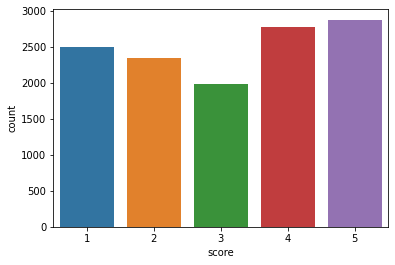

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('reviews.csv')

print('Dataset size:',df.shape)
print('Total number of Google App Review: {}'.format(len(df)))

#visualisation of the % of score for each score type
score_representation = df['score'].value_counts()
plt.pie(score_representation, labels = score_representation.index, autopct = '%1.1ff%%')
plt.title('Percentage of different scores in dataset')
plt.show()
sns.countplot(df.score)
plt.xlabel('score')
df.sample(3) #random rows in our dataset

In [ ]:
#Finding null values in the dataset
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2162
at                         0
replyContent            6677
repliedAt               6677
sortOrder                  0
appId                      0
dtype: int64

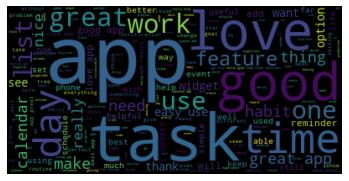

In [ ]:
from wordcloud import WordCloud
# visualisation of most common words with the positive review, with score higher or equal to 4
high_score = df[df['score']>=4]
text = ' '.join(score.lower() for score in high_score['content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

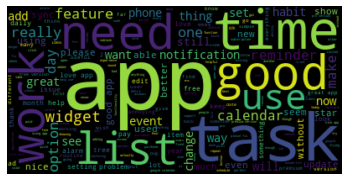

In [ ]:
# visualisation of most common words with the neutral review, with score equal to 3
neutral_score = df[df['score']==3]
text = ' '.join(score.lower() for score in neutral_score['content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

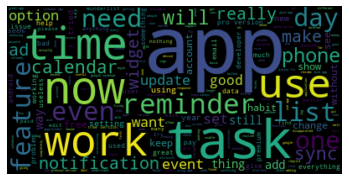

In [ ]:
# visualisation of most common words with the negative review, with score equal or lower than 2
negative_score = df[df['score']<=2]
text = ' '.join(score.lower() for score in negative_score['content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

The important part in this dataset for us is 'Content' and 'Score'. The first one has reviews and the second one has the starts given by the user.

# Data Normalization and Data Loader

In this step we would create a class for loading the dataset and pre-process it. The preprocess includes:
1. Make all words lower case
2. Removing emojies
3. Replace contractions
4. Removing letter repetition
5. Removing punctuation
6. Removing hashtags
7. Removing the stopwords

we have all these actions in the function below as it recieves a text and returns a cleaned text

In [ ]:
!pip install emoji
!pip install contractions

In [ ]:
import contractions
import emoji
import re

def normalize_text(text):
  replace_content = ''
  text = emoji.demojize(text)# transform from emoji to a string
  for k, v in contractions.contractions_dict.items():
    text = text.replace(k,v)#working word contractions
  text = re.sub(r'(.)\1+', r'\1\1', text)#removing letter repetition
  text = re.sub(r'[\?\.\!]+(?=[\?\.\!])',replace_content, text)#removing punctuation repetition
  text = re.sub('#+', ' ', text)# remove hashtag

  return text


In [ ]:
# we would now build the dataset inference based on pytorch 'dataset' class
# we would also remove stopwords, punctuation and emojies while loading the
# dataset. meanwhile we would build the vocabulary when we load the dataset

import nltk
from torch.utils.data import Dataset
import torch
from string import punctuation
from nltk.corpus import stopwords
import reprlib

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

class Google_play_Dataset(Dataset):
  "Google play reviews dataset"
  def __init__(self, csv_file):
      """
      Args:
          csv_file (string): Path to the csv file.

      """
      # Changing the scores from 5 classes to 3 classes so we may
      # have a better sentiment analysis

      self.dataset = pd.read_csv(csv_file)
      self.dataset.loc[self.dataset['score'] <= 2, 'score'] = 1
      self.dataset.loc[self.dataset['score'] == 3, 'score'] = 2
      self.dataset.loc[self.dataset['score'] >= 4, 'score'] = 3
      self.vocab = list()

  def __len__(self):
      return len(self.dataset)

  def __getitem__(self, idx):
      if torch.is_tensor(idx):
          idx = idx.tolist()
      replace_content = ''
      text = "".join([ch for ch in self.dataset['content'][idx] 
                      if ch not in punctuation]).lower() #removing capitalization
      
      review = normalize_text(text)
      score  = self.dataset['score'][idx]

      edited_review = ''
      for word in review.split():   # at this part we wouldn't save stop words
        if word not in stop_words:  # in our vocabulary
          self.vocab.append(word)
          edited_review = edited_review + ' ' + word

      sample = {'review': edited_review, 'score': score}

      return sample

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# With this part of code we would save a shuffled version of
# our dataset in the working directory (since the original version
# is ordered by the scores of the reviews)

data = pd.read_csv('reviews.csv')
dataset = data.sample(frac=1)
dataset.to_csv('shuffled_reviews.csv')

In [ ]:
# Now we would load the dataset with our dataset loader class that
# we built earlier

dataset_loader = Google_play_Dataset('shuffled_reviews.csv')

In [ ]:
# We can see the first five reviews in our dataset:

max_size = 0

for i in range(len(dataset_loader)):
    sample = dataset_loader[i]
    if i < 5:
        print(i, sample['review'], sample['score'])

0  ruin plan going waste time customizing downloading app increase screen time degrade efficiency 1
1  complexity unavailability useful feature free kill interest atleast widget available trials 1
2  please add feature let switch lists swiping right left list page thank much great app :clapping_hands::clapping_hands: 3
3  bad app 1
4  best 2


In [ ]:
# sorting words in the datset based on number of occurance in the dataset

from collections import Counter 

count_words = Counter(dataset_loader.vocab)
total_words=len(dataset_loader.vocab)

sorted_words=count_words.most_common(total_words)

print("Top ten occuring words : ", sorted_words[:10])

Top ten occuring words :  [('app', 7548), ('good', 1724), ('like', 1722), ('use', 1604), ('time', 1525), ('tasks', 1487), ('great', 1484), ('would', 1328), ('really', 1210), ('calendar', 1187)]


In [ ]:
# change words in vocabulary to integers base on their
# position in sorted words

integer_based_vocab={w:i+1 for i,(w,c) in enumerate(sorted_words)}
print(integer_based_vocab)

{'app': 1, 'good': 2, 'like': 3, 'use': 4, 'time': 5, 'tasks': 6, 'great': 7, 'would': 8, 'really': 9, 'calendar': 10, 'task': 11, 'love': 12, 'one': 13, 'dont': 14, 'version': 15, 'day': 16, 'cant': 17, 'work': 18, 'get': 19, 'list': 20, 'im': 21, 'add': 22, 'doesnt': 23, 'prthemium': 24, 'even': 25, 'need': 26, 'phone': 27, 'also': 28, 'free': 29, 'make': 30, 'update': 31, 'using': 32, 'widget': 33, 'want': 34, 'new': 35, 'nice': 36, 'set': 37, 'google': 38, 'see': 39, 'please': 40, 'could': 41, 'easy': 42, 'way': 43, 'features': 44, 'ive': 45, 'used': 46, 'sync': 47, 'much': 48, 'best': 49, 'apps': 50, 'feature': 51, 'option': 52, 'still': 53, 'better': 54, 'habits': 55, 'keep': 56, '5': 57, 'rtheminders': 58, 'well': 59, 'every': 60, 'pro': 61, 'ththem': 62, 'things': 63, 'rtheminder': 64, 'pay': 65, 'useful': 66, 'without': 67, 'simple': 68, 'events': 69, 'far': 70, 'back': 71, 'ads': 72, 'everything': 73, 'many': 74, 'notifications': 75, 'daily': 76, 'able': 77, 'account': 78, 'c

In [ ]:
# Tokenize the reviews base in the their rank in the 'integer_based_vocab'
# that we built earlier. the output for "encode_reviews" function would be
# two list of tokenized reviews and scores

def encode_reviews(dataset,vocab_int):
  all_scores =list()
  all_reviews=list()
  for index in range(len(dataset)):
    review = dataset[index]['review']
    encoded = list()
    for word in review.split():
      if word not in vocab_int.keys():
        encoded.append(0)
      else:
        encoded.append(int(vocab_int[word]))

    all_reviews.append(encoded)
    all_scores.append(dataset[index]['score'])

  return all_reviews, all_scores

  
encoded_data, all_scores = encode_reviews(dataset_loader, integer_based_vocab)


In [ ]:
# We would print out 5 reviews in both original and tokenized version

counter = 0
for tokenized in encoded_data:
  print(tokenized)
  sample = dataset_loader[counter]
  print(sample['review'])
  counter += 1
  if counter == 5:
    break

[2285, 247, 141, 364, 5, 2768, 1077, 1, 849, 87, 5, 4339, 3092]
 ruin plan going waste time customizing downloading app increase screen time degrade efficiency
[1987, 6003, 66, 51, 29, 2286, 1778, 1219, 33, 201, 2769]
 complexity unavailability useful feature free kill interest atleast widget available trials
[40, 22, 51, 191, 455, 88, 2487, 210, 553, 20, 440, 169, 48, 7, 1, 6004]
 please add feature let switch lists swiping right left list page thank much great app :clapping_hands::clapping_hands:
[136, 1]
 bad app
[49]
 best


In [ ]:
# in this step we will cut long reviews with a maximum threshold
# and fill short reviews with 0 values. also we would one-hot
# scores so we can use it later when we want to measure performance.
# The "encoded_array" includes same-length and tokenized reviews

from torch.nn.functional import one_hot
import numpy as np

max_length = 50
encoded_array=np.zeros((len(encoded_data), max_length), dtype='int')



for i, review in enumerate(encoded_data):
  review_len=len(review)
  if review_len <= max_length:
    zeros=list(np.zeros(max_length-review_len))
    new = review + zeros
  else:
    new=review[:max_length]
  encoded_array[i,:]=np.array(new)

# some random review
print('sample review:',dataset_loader[2857]['review'])

# The tokenized version of that review
print('tokenized review:',encoded_array[2857])

# shape of the encoded_array
print('shape of reviews:',encoded_array.shape)


scores = np.array(all_scores)
np.array([scores]).reshape(-1)

one_hot_scores = np.zeros((12495,3))
for i in range(scores.size):
  one_hot_scores[i,scores[i] - 1] = 1  

scores = one_hot_scores

# shape of scores part of dataset
print('shape of scores:',scores.shape)

# score of the above review
print('score:',scores[2857])

sample review:  good
tokenized review: [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
shape of reviews: (12495, 50)
shape of scores: (12495, 3)
score: [0. 0. 1.]


# Train, Validation, Test split

In this step we would split the data in separate parts. we would also use them as inputs for PyTorch TensorDataset to prepare them for our models

In [ ]:
train_x=encoded_array[:10050]
train_y=scores[:10050]
valid_x=encoded_array[10050:11250]
valid_y=scores[10050:11250]
test_x=encoded_array[11250:]
test_y=scores[11250:]
print('size of train part:',len(train_y),
      'size of validation part:', len(valid_y),
      'size of test part:',len(test_y),sep = '\n')

size of train part:
10050
size of validation part:
1200
size of test part:
1245


In [ ]:
# Presence of each class in our dataset, the first column is
# Negative reviews, the second one is neutral reviews and the
# last one is positive reviews

print('Train:',train_y.sum(axis = 0))
print('Valid:',valid_y.sum(axis = 0))
print('Test: ',test_y.sum(axis = 0))

Train: [3864. 1592. 4594.]
Valid: [485. 195. 520.]
Test:  [501. 204. 540.]


its a bit obvious that the neutral class has lower number of records in our dataset, as we changed the dataset score from 5 classes to just 3 classes

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data=TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data=TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

#dataloader
batch_size=15
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=True)

# Sentiment Analysis Model Implementation


## 1. LSTM Model

in this model we would use an LSTM achitecture followd by a dense block

The hyper-parameter tuning has been done for this part.

### Model

In [ ]:
import torch.nn as nn
 
class SentimentalLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        #dropout layer
        self.dropout=nn.Dropout(0.4)
        
        self.fc1=nn.Linear(hidden_dim, 64)
        self.fc2=nn.Linear(64, 32)
        self.fc3=nn.Linear(32,output_size)
        self.soft=nn.Softmax(dim = 1)

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()

        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)
        
        #stack up the lstm output
        lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)
        
        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
        out=self.dropout(out)
        out=self.fc2(out)
        out=self.dropout(out)
        out=self.fc3(out)
        out = out.view(int(batch_size[0]), self.output_size, -1)
        out = out[:, :, -1]

        return out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        return hidden

### Accuracy check function for LSTM

In [ ]:
def accuracy_check(set_check):
  cm = [[0,0,0],[0,0,0],[0,0,0]]
  test_losses = [] # track loss
  num_correct = 0

  # init hidden state
  h = net.init_hidden(batch_size)

  net.eval()
  # iterate over test data
  for inputs, labels in set_check:

      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])

      if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()


      output, h = net(inputs, h)

      for row,column in zip(output,labels):
              cm[int(row.argmax())][int(column.argmax())] += 1
      # calculate loss
      test_loss = criterion(output.squeeze(), labels.float().squeeze())
      test_losses.append(test_loss.item())

      out = torch.argmax(output, dim=1)
      pred = torch.zeros_like(output).scatter_(1, out.unsqueeze(1), 1.)


      # compare predictions to true label
      correct = int((pred == labels).all(dim = 1).float().sum().cpu().numpy())
      num_correct += correct

  # accuracy over all test data
  test_acc = num_correct/len(set_check.dataset)
  return test_acc*100, cm

### Train the model and performance visualization

In [ ]:
# For having a reproducable result
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# LSTM initialization parameter
vocab_size = len(integer_based_vocab)+1 # +1 for the 0 padding
output_size = 3
embedding_dim = 200
hidden_dim = 256
n_layers = 3

# creating the model
net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

# Training Hyper-parameters
lr=0.0001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
epochs = 15
counter = 0
print_every = 100
clip= 10

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    net.cuda()

# Performance trackers (we would use these list to visualize the
# performance of the model on a specific data split)
lstm_val_loss_list = []
lstm_loss_list = []
lstm_acc_train_list = []
lstm_acc_val_list = []

# Creating Confusion matrix to get more metrics than just accuracy
# for each class



# This function would calculate F1, Precision, and Recall based on the confusion matrix
def calculate_metrics(confusion):
  confusion_matrix = np.array(confusion)
  metrics = {'Negative Precision':0,
           'Negative Recall':0,
           'Negative F1':0,
           'Neutral Precision':0,
           'Neutral Recall':0,
           'Neutral F1':0,
           'Positive Precision':0,
           'Positive Recall':0,
           'Positive F1':0,}

  metrics['Negative Precision'] = confusion_matrix[0,0] / confusion_matrix.sum(axis = 1)[0]
  metrics['Neutral Precision'] = confusion_matrix[1,1] / confusion_matrix.sum(axis = 1)[1]
  metrics['Positive Precision'] = confusion_matrix[2,2] / confusion_matrix.sum(axis = 1)[2]

  metrics['Negative Recall'] = confusion_matrix[0,0] / confusion_matrix.sum(axis = 0)[0]
  metrics['Neutral Recall'] =confusion_matrix[1,1] / confusion_matrix.sum(axis = 0)[1]
  metrics['Positive Recall'] = confusion_matrix[2,2] / confusion_matrix.sum(axis = 0)[2]

  metrics['Negative F1'] = 2 * metrics['Negative Precision'] * metrics['Negative Recall'] / (metrics['Negative Precision'] + metrics['Negative Recall'])
  metrics['Neutral F1'] = 2 * metrics['Neutral Precision'] * metrics['Neutral Recall'] / (metrics['Neutral Precision'] + metrics['Neutral Recall'])
  metrics['Positive F1'] = 2 * metrics['Positive Precision'] * metrics['Positive Recall'] / (metrics['Positive Precision'] + metrics['Positive Recall'])

  return metrics

net.train()
# train for some number of epochs
for e in range(epochs):

    # creating confusion matrix
    confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]

    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs ,h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float().squeeze())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        for row,column in zip(output,labels):
            confusion_matrix[int(row.argmax())][int(column.argmax())] += 1

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                inputs, labels = inputs.cuda(), labels.cuda()  
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float().squeeze())

                val_losses.append(val_loss.item())
            

            
            train_acc = accuracy_check(train_loader)[0]
            val_acc = accuracy_check(valid_loader)[0]
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.3f}...".format(loss.item()),
                  "Val Loss: {:.3f}".format(np.mean(val_losses)),
                  "Train Acc: {:.2f}".format(train_acc),
                  "Val Acc: {:.2f}".format(val_acc),
                  sep = '\t')
            
            lstm_val_loss_list.append(np.mean(val_losses))
            lstm_loss_list.append(loss.item())
            lstm_acc_train_list.append(train_acc)
            lstm_acc_val_list.append(val_acc)

SentimentalLSTM(
  (embedding): Embedding(13897, 200)
  (lstm): LSTM(200, 256, num_layers=3, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (soft): Softmax(dim=1)
)
Epoch: 1/15...	Step: 100...	Loss: 1.208...	Val Loss: 1.034	Train Acc: 46.05	Val Acc: 43.75
Epoch: 1/15...	Step: 200...	Loss: 1.053...	Val Loss: 1.026	Train Acc: 46.19	Val Acc: 44.25
Epoch: 1/15...	Step: 300...	Loss: 0.882...	Val Loss: 1.024	Train Acc: 46.08	Val Acc: 44.08
Epoch: 1/15...	Step: 400...	Loss: 1.059...	Val Loss: 1.020	Train Acc: 46.23	Val Acc: 44.42
Epoch: 1/15...	Step: 500...	Loss: 0.966...	Val Loss: 1.019	Train Acc: 49.89	Val Acc: 49.33
Epoch: 1/15...	Step: 600...	Loss: 1.075...	Val Loss: 1.017	Train Acc: 50.98	Val Acc: 49.17
Epoch: 2/15...	Step: 700...	Loss: 1.101...	Val Loss: 1.020	Train Acc: 46.37	Val 

### Visualization of LSTM performance

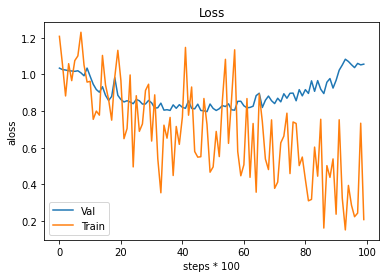

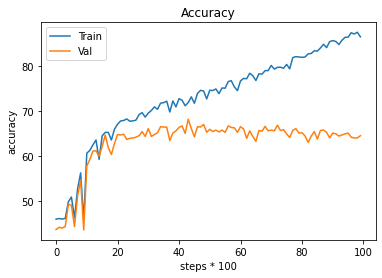

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Loss')
plt.xlabel('steps * 100')
plt.ylabel('aloss')
plt.plot(lstm_val_loss_list)
plt.plot(lstm_loss_list)

plt.legend(['Val','Train'])


plt.figure()
plt.title('Accuracy')
plt.xlabel('steps * 100')
plt.ylabel('accuracy')
plt.plot(lstm_acc_train_list)
plt.plot(lstm_acc_val_list)

plt.legend(['Train','Val'])

plt.show()

### Performance Metrics

In [ ]:
calculate_metrics(confusion_matrix)

{'Negative F1': 0.8709104742581791,
 'Negative Precision': 0.8538040775733466,
 'Negative Recall': 0.8887163561076604,
 'Neutral F1': 0.5790229885057471,
 'Neutral Precision': 0.6761744966442953,
 'Neutral Recall': 0.5062814070351759,
 'Positive F1': 0.8979851537645811,
 'Positive Precision': 0.8755169561621174,
 'Positive Recall': 0.9216369177187637}

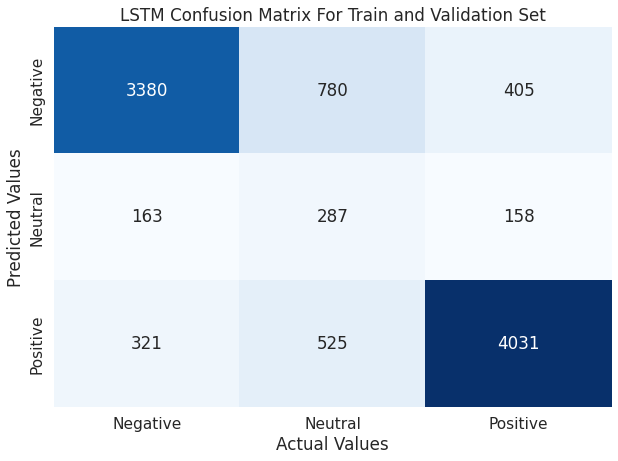

In [ ]:
df_cm = pd.DataFrame(np.array(confusion_matrix,dtype = 'int'), index = [i for i in ['Negative','Neutral','Positive']],
                  columns = [i for i in ['Negative','Neutral','Positive']])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g',cbar=False)
plt.title('LSTM Confusion Matrix For Train and Validation Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Use model on the test dataset

In [ ]:
test_metrics = accuracy_check(test_loader)
print('Test Accuracy:','{0:.4}'.format(test_metrics[0]))

Test Accuracy: 67.31


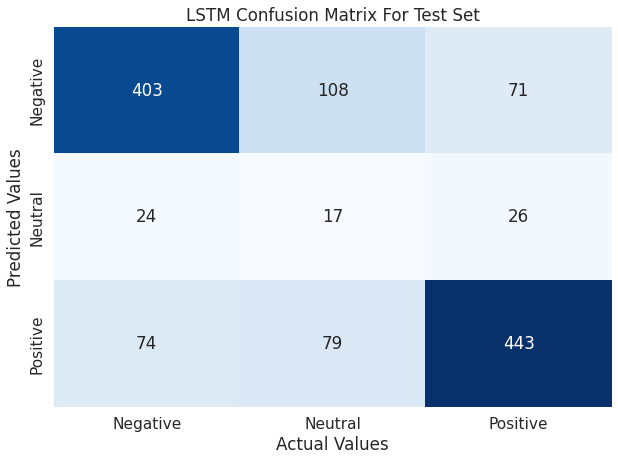

In [ ]:
df_cm = pd.DataFrame(np.array(test_metrics[1],dtype = 'int'), index = [i for i in ['Negative','Neutral','Positive']],
                  columns = [i for i in ['Negative','Neutral','Positive']])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g',cbar=False)
plt.title('LSTM Confusion Matrix For Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
calculate_metrics(test_metrics[1])

{'Negative F1': 0.7112403100775194,
 'Negative Precision': 0.6911487758945386,
 'Negative Recall': 0.7325349301397206,
 'Neutral F1': 0.21893491124260353,
 'Neutral Precision': 0.27611940298507465,
 'Neutral Recall': 0.18137254901960784,
 'Positive F1': 0.775,
 'Positive Precision': 0.7482758620689656,
 'Positive Recall': 0.8037037037037037}

## 2. GRU Model

in this model we would use an GRU achitecture followd by a dense block

The hyper-parameter tuning has been done for this part.

### Model

In [ ]:
  import torch.nn as nn
  
  class GRU_Sentiment(nn.Module):
      def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
          """
          Initialize the model by setting up the layers
          """
          super().__init__()
          self.output_size=output_size
          self.n_layers=n_layers
          self.hidden_dim=hidden_dim
          
          #Embedding and GRU layers
          self.embedding=nn.Embedding(vocab_size, embedding_dim)
          self.gru=nn.GRU(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
          
          #dropout layer
          self.dropout=nn.Dropout(0.3)
          
          self.fc1=nn.Linear(hidden_dim, 64)
          self.fc2=nn.Linear(64, 32)
          self.fc3=nn.Linear(32,3)


      def forward(self, x, hidden):
          """
          Perform a forward pass of our model on some input and hidden state.
          """
          batch_size=x.size()

          #Embadding and gru output
          embedd=self.embedding(x)
          gru_out, hidden=self.gru(embedd, hidden)
          
          #stack up the lstm output
          gru_out=gru_out.contiguous().view(-1, self.hidden_dim)
          
          #dropout and fully connected layers

          out=self.fc1(gru_out)
          out=self.fc2(out)
          out=self.fc3(out)
          out = out.view(int(batch_size[0]), self.output_size, -1)
          out = out[:, :, -1]

          return out
          
      
      def init_hidden(self, batch_size):
          """Initialize Hidden STATE"""
          # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
          # initialized to zero, for hidden state and cell state of LSTM
          weight = next(self.parameters()).data
          
          if (train_on_gpu):
              hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
          else:
              hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
          return hidden

### Accuracy Check for GRU

In [ ]:
def accuracy_check(set_check):
  cm = [[0,0,0],[0,0,0],[0,0,0]]
  test_losses = [] # track loss
  num_correct = 0

  # init hidden state
  h = net.init_hidden(batch_size)

  net.eval()
  # iterate over test data
  for inputs, labels in set_check:

      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = h.data
      if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()


      output = net(inputs, h)
      for row,column in zip(output,labels):
        cm[int(row.argmax())][int(column.argmax())] += 1

      # calculate loss
      test_loss = criterion(output.squeeze(), labels.float().squeeze())
      test_losses.append(test_loss.item())

      out = torch.argmax(output, dim=1)
      pred = torch.zeros_like(output).scatter_(1, out.unsqueeze(1), 1.)
      
      # compare predictions to true label
      correct = int((pred == labels).all(dim = 1).float().sum().cpu().numpy())
      num_correct += correct



  # accuracy over all test data
  test_acc = num_correct/len(set_check.dataset)
  return test_acc * 100, cm

### Train the model and performance visualization

In [ ]:
# GRU initialization parameter
vocab_size = len(integer_based_vocab)+1 # +1 for the 0 padding
output_size = 3
embedding_dim = 1024
hidden_dim = 256
n_layers = 5

# Creating model
net = GRU_Sentiment(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

# Training Hyper-parameters
lr=0.00001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
epochs = 15
counter = 0
print_every = 100
clip=2


# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    net.cuda()

# Performance trackers (we would use these list to visualize the
# performance of the model on a specific data split)
val_loss_list = []
loss_list = []
acc_train_list = []
acc_test_list = []
acc_val_list = []

# Creating Confusion matrix to get more metrics than just accuracy
# for each class

metrics = {'Negative Precision':0,
           'Negative Recall':0,
           'Negative F1':0,
           'Neutral Precision':0,
           'Neutral Recall':0,
           'Neutral F1':0,
           'Positive Precision':0,
           'Positive Recall':0,
           'Positive F1':0,}

# This function would calculate F1, Precision, and Recall based on the confusion matrix
def calculate_metrics(confusion):
  confusion_matrix = np.array(confusion)
  global metrics
  metrics['Negative Precision'] = confusion_matrix[0,0] / confusion_matrix.sum(axis = 1)[0]
  metrics['Neutral Precision'] = confusion_matrix[1,1] / confusion_matrix.sum(axis = 1)[1]
  metrics['Positive Precision'] = confusion_matrix[2,2] / confusion_matrix.sum(axis = 1)[2]

  metrics['Negative Recall'] = confusion_matrix[0,0] / confusion_matrix.sum(axis = 0)[0]
  metrics['Neutral Recall'] = confusion_matrix[1,1] / confusion_matrix.sum(axis = 0)[1]
  metrics['Positive Recall'] = confusion_matrix[2,2] / confusion_matrix.sum(axis = 0)[2]

  metrics['Negative F1'] = 2 * metrics['Negative Precision'] * metrics['Negative Recall'] / (metrics['Negative Precision'] + metrics['Negative Recall'])
  metrics['Neutral F1'] = 2 * metrics['Neutral Precision'] * metrics['Neutral Recall'] / (metrics['Neutral Precision'] + metrics['Neutral Recall'])
  metrics['Positive F1'] = 2 * metrics['Positive Precision'] * metrics['Positive Recall'] / (metrics['Positive Precision'] + metrics['Positive Recall'])

  return metrics


net.train()
# train for some number of epochs
for e in range(epochs):

    confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
       
        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history

        h = h.data
        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output = net(inputs,h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float().squeeze())
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        for row,column in zip(output,labels):
            confusion_matrix[int(row.argmax())][int(column.argmax())] += 1


        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = h.data

                inputs, labels = inputs.cuda(), labels.cuda()  
                output = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float().squeeze())

                val_losses.append(val_loss.item())
            
                        
            train_acc = accuracy_check(train_loader)[0]
            val_acc = accuracy_check(valid_loader)[0]

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.3f}...".format(loss.item()),
                  "Val Loss: {:.3f}".format(np.mean(val_losses)),
                  "Train Acc: {:.2f}".format(train_acc),
                  "Val Acc: {:.2f}".format(val_acc),
                  sep = '\t')
            
            val_loss_list.append(np.mean(val_losses))
            loss_list.append(loss.item())
            acc_train_list.append(train_acc)
            acc_val_list.append(val_acc)

GRU_Sentiment(
  (embedding): Embedding(13897, 1024)
  (gru): GRU(1024, 256, num_layers=5, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
)
Epoch: 1/15...	Step: 100...	Loss: 1.085...	Val Loss: 1.044	Train Acc: 45.71	Val Acc: 43.33
Epoch: 1/15...	Step: 200...	Loss: 1.072...	Val Loss: 1.031	Train Acc: 45.71	Val Acc: 43.33
Epoch: 1/15...	Step: 300...	Loss: 1.096...	Val Loss: 1.029	Train Acc: 45.71	Val Acc: 43.33
Epoch: 1/15...	Step: 400...	Loss: 1.037...	Val Loss: 1.026	Train Acc: 45.71	Val Acc: 43.33
Epoch: 1/15...	Step: 500...	Loss: 0.930...	Val Loss: 1.025	Train Acc: 45.71	Val Acc: 43.33
Epoch: 1/15...	Step: 600...	Loss: 0.852...	Val Loss: 1.020	Train Acc: 45.72	Val Acc: 43.33
Epoch: 2/15...	Step: 700...	Loss: 1.113...	Val Loss: 1.018	Train Acc: 51.20	Val Acc: 48.08
Epoch: 2/15...	S

### Visualization of GRU performance

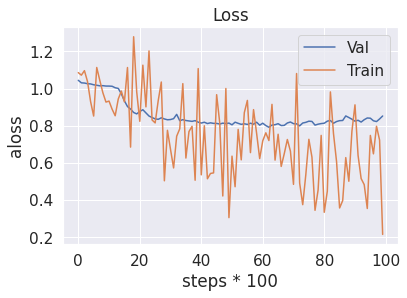

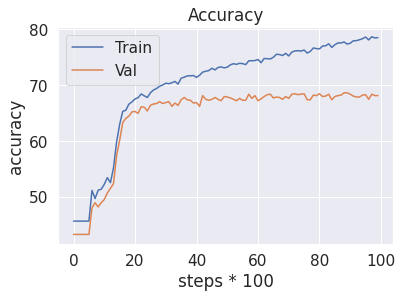

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Loss')
plt.xlabel('steps * 100')
plt.ylabel('aloss')
plt.plot(val_loss_list)
plt.plot(loss_list)

plt.legend(['Val','Train'])


plt.figure()
plt.title('Accuracy')
plt.xlabel('steps * 100')
plt.ylabel('accuracy')
plt.plot(acc_train_list)
plt.plot(acc_val_list)

plt.legend(['Train','Val'])

plt.show()

### Performance Metrics

In [ ]:
confusion_matrix
calculate_metrics(confusion_matrix)

{'Negative F1': 0.8019931189939495,
 'Negative Precision': 0.7404162102957283,
 'Negative Recall': 0.8747412008281573,
 'Neutral F1': 0.26090909090909087,
 'Neutral Precision': 0.4720394736842105,
 'Neutral Recall': 0.18027638190954773,
 'Positive F1': 0.8512300707422659,
 'Positive Precision': 0.8265327045314743,
 'Positive Recall': 0.8774488463212886}

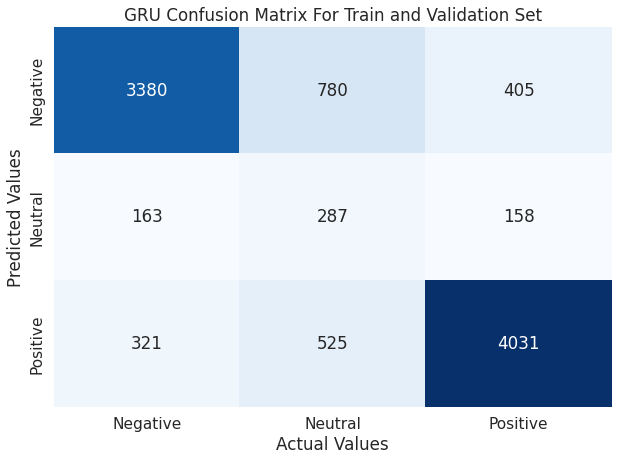

In [ ]:
df_cm = pd.DataFrame(np.array(confusion_matrix,dtype = 'int'), index = [i for i in ['Negative','Neutral','Positive']],
                  columns = [i for i in ['Negative','Neutral','Positive']])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g',cbar=False)
plt.title('GRU Confusion Matrix For Train and Validation Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
test_metrics = accuracy_check(test_loader)
print('Test Accuracy:','{0:.4}'.format(test_metrics[0]))

Test Accuracy: 69.32


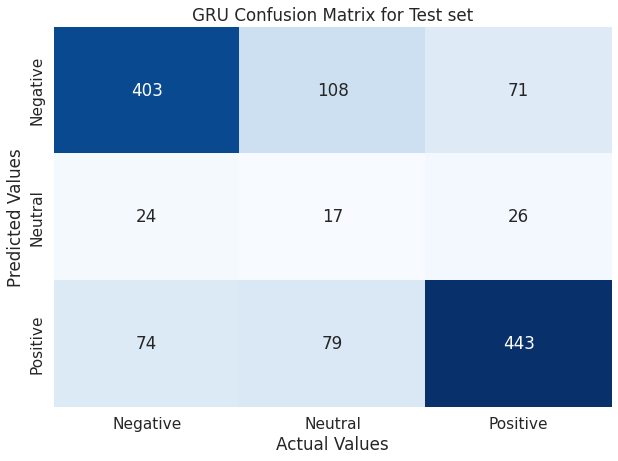

In [ ]:
df_cm = pd.DataFrame(np.array(test_metrics[1],dtype = 'int'), index = [i for i in ['Negative','Neutral','Positive']],
                  columns = [i for i in ['Negative','Neutral','Positive']])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g',cbar=False)
plt.title('GRU Confusion Matrix for Test set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
calculate_metrics(test_metrics[1])

{'Negative F1': 0.7442289935364728,
 'Negative Precision': 0.6924398625429553,
 'Negative Recall': 0.8043912175648703,
 'Neutral F1': 0.12546125461254615,
 'Neutral Precision': 0.2537313432835821,
 'Neutral Recall': 0.08333333333333333,
 'Positive F1': 0.7799295774647887,
 'Positive Precision': 0.7432885906040269,
 'Positive Recall': 0.8203703703703704}

## 3. LSTM v GRU

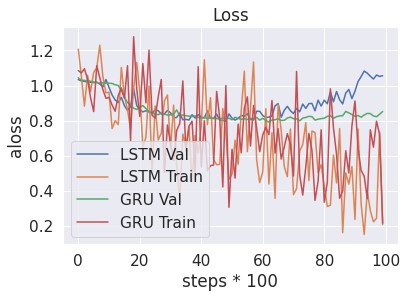

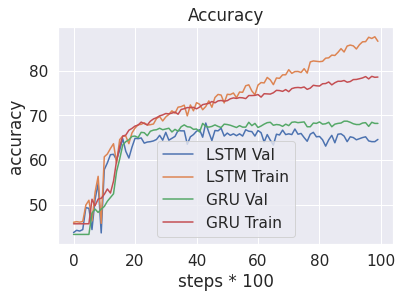

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Loss')
plt.xlabel('steps * 100')
plt.ylabel('aloss')
plt.plot(lstm_val_loss_list)
plt.plot(lstm_loss_list)
plt.plot(val_loss_list)
plt.plot(loss_list)

plt.legend(['LSTM Val','LSTM Train','GRU Val','GRU Train'])


plt.figure()
plt.title('Accuracy')
plt.xlabel('steps * 100')
plt.ylabel('accuracy')
plt.plot(lstm_acc_val_list)
plt.plot(lstm_acc_train_list)

plt.plot(acc_val_list)
plt.plot(acc_train_list)

plt.legend(['LSTM Val','LSTM Train','GRU Val','GRU Train'])

plt.show()